* Let install some required tools

In [62]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

* We load the data

In [63]:
symbol = ['NFLX']
data = yf.download(symbol, start='2023-01-01', end='2023-12-31')
data = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


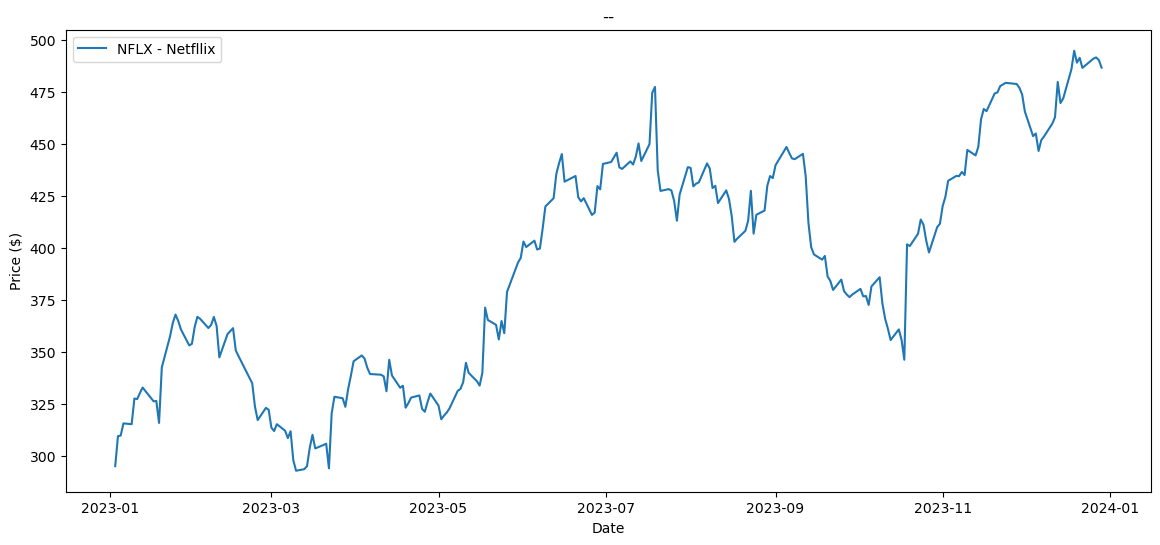

In [64]:
# Ploting
plt.figure(figsize=(14, 6))
plt.plot(data, label='NFLX - Netfllix')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

* Data normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler

close_prices = data.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

* label

In [66]:
import tensorflow as tf
n_steps = 10

# Utils
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Generate sequence
X, y = create_sequences(scaled_data, n_steps)

# Reshape X to be 3 tensor [sample, time_Step, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
X_tensor, y_tensor = tf.convert_to_tensor(X, dtype=tf.float32), tf.convert_to_tensor(y, dtype=tf.float32)

# For moment
X_train, y_train = X_tensor, y_tensor

* Model

In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD

model = Sequential([
    LSTM(50, input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer=SGD(), loss="mean_squared_error")
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2712  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1277 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0419 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0369 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0353 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0337 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278 
Epoch 16/100
8/8 ━━━━━━━━━━━━━

* Prediction

In [72]:
predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


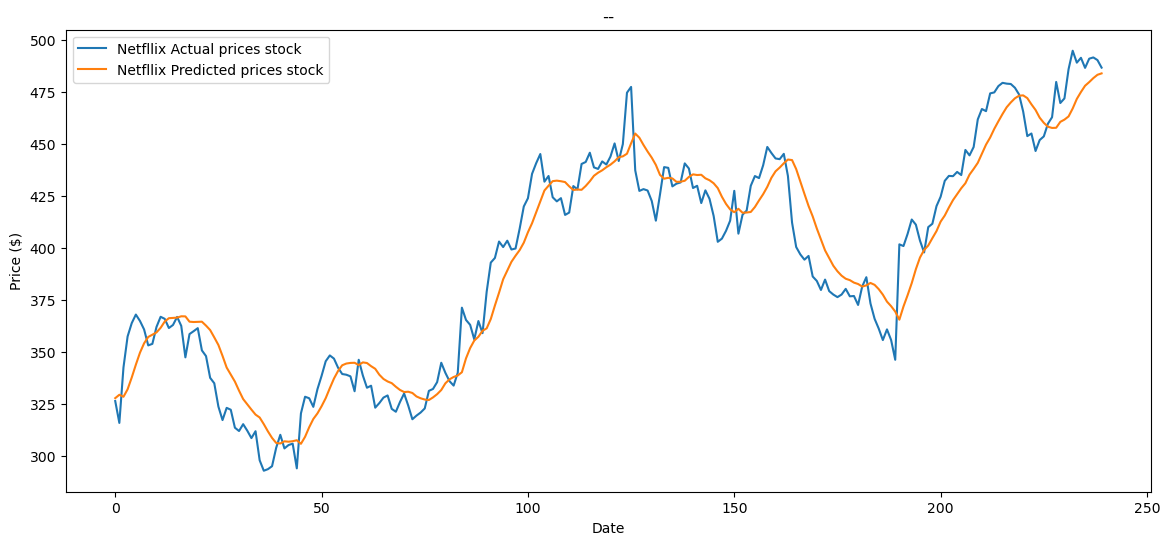

In [76]:
plt.figure(figsize=(14, 6))
plt.plot(close_prices[n_steps:], label='Netfllix Actual prices stock')
plt.plot(predicted_stock_price, label='Netfllix Predicted prices stock')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


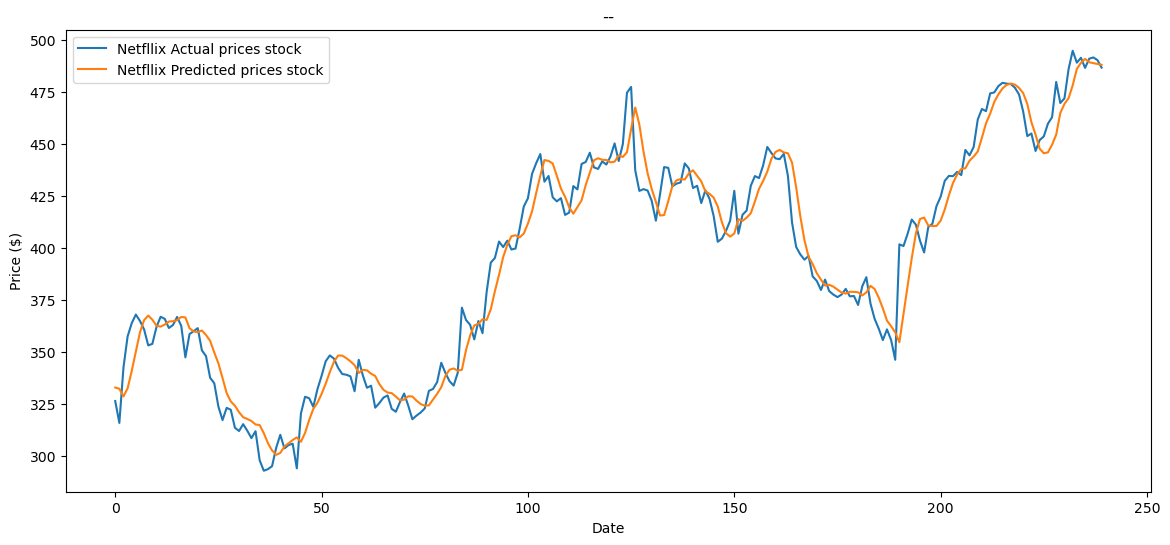

In [77]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD

model = Sequential([
    LSTM(50, input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss="mean_squared_error")
history2 = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False)

predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(14, 6))
plt.plot(close_prices[n_steps:], label='Netfllix Actual prices stock')
plt.plot(predicted_stock_price, label='Netfllix Predicted prices stock')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


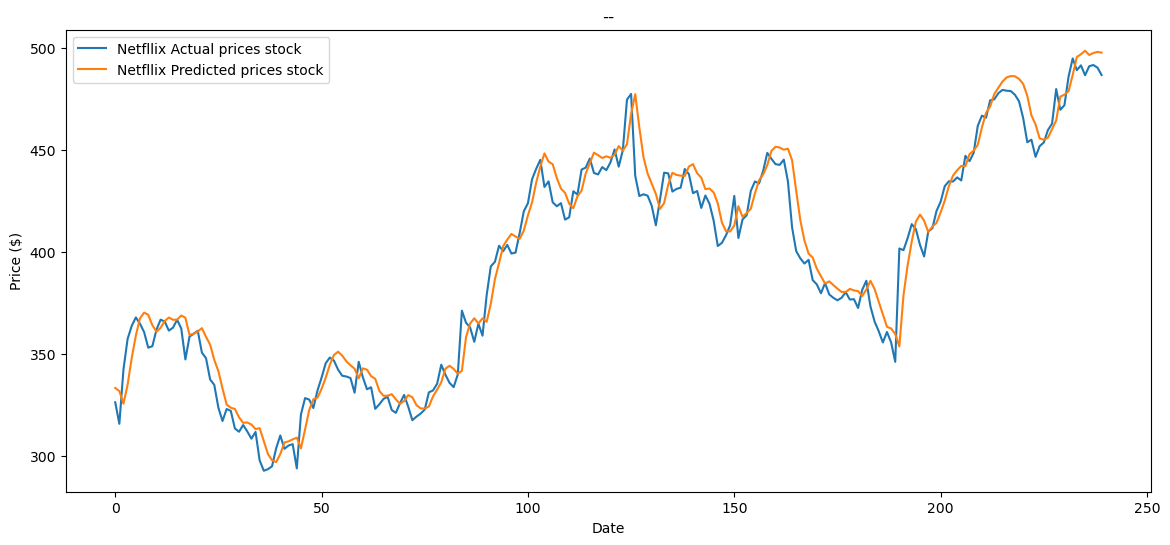

In [78]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import RMSprop

model = Sequential([
    LSTM(50, input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer=RMSprop(), loss="mean_squared_error")
history3 = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=False)

predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(14, 6))
plt.plot(close_prices[n_steps:], label='Netfllix Actual prices stock')
plt.plot(predicted_stock_price, label='Netfllix Predicted prices stock')
plt.title('--')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

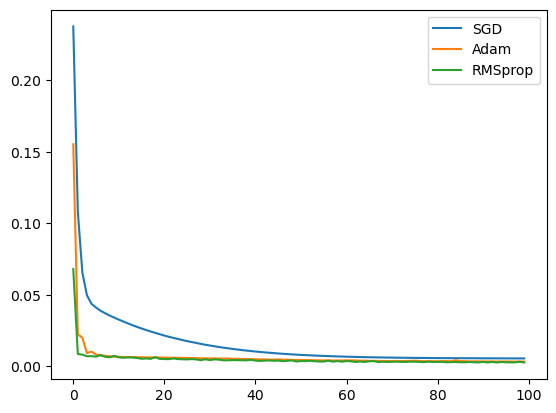

In [79]:
# summarize history for loss
plt.plot(history1.history['loss'], label="SGD")
plt.plot(history2.history['loss'], label="Adam")
plt.plot(history3.history['loss'], label="RMSprop")
plt.legend()
plt.show()